# Mapper実装-例1：同心円（ノイズなし）

kmapper.KeplerMapperモジュールの解説：
https://kepler-mapper.scikit-tda.org/en/latest/reference/stubs/kmapper.KeplerMapper.html

パッケージのインストール

In [40]:
import kmapper as km 
from kmapper.plotlyviz import plotlyviz
import sklearn

KeplerMapperを用意

In [41]:
mapper = km.KeplerMapper(verbose=0) # verboseの引数は0（ログを取らない）か1（一部ログを取る）か2（完全にログを取る）．

データセットを用意

円周上に等間隔で分布するデータセット（データ点の数：5000，外側の円の半径：1，内側の円の半径：0.3）

In [42]:
from sklearn.datasets import make_circles

data, labels = make_circles(n_samples=5000, factor=0.3, random_state=1)
data
# dataにはデータ点の座標の配列，labelsには各データ点に対応する正解ラベルの配列を代入．
# n_samples：データ点の数，factor：内側の円の半径．

array([[ 0.23635164,  0.18476445],
       [ 0.25001537, -0.16580807],
       [-0.29612747, -0.04804705],
       ...,
       [-0.64705596,  0.76244251],
       [-0.25125841, -0.1639183 ],
       [ 0.8305959 ,  0.55687562]])

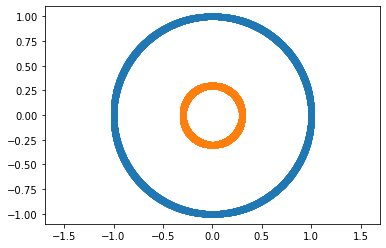

In [43]:
# データセットの分布．
import numpy as np
import matplotlib.pyplot as plt
 
X0 = data[labels==0]
X1 = data[labels==1]
 
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.axis('equal')
 
plt.show()

フィルター関数を考え，レンズ（フィルター関数によるデータ点の像の配列）を計算

フィルター関数：1つの軸（x軸）への写像：f:X（データセット）⊂R^2→R

レンズ：データ点のx座標

スケーリング：なし

In [44]:
lens = mapper.fit_transform(data, projection=[0], scaler=None) 
# projection：射影（デフォルト：sum），scaler：スケーリング（デフォルト：最小最大正規化）．
lens

array([[ 0.23635164],
       [ 0.25001537],
       [-0.29612747],
       ...,
       [-0.64705596],
       [-0.25125841],
       [ 0.8305959 ]])

被覆やクラスタリング手法を考え，Mapperグラフをつくる

n_cubes：15，percent overlap：10%

クラスタリング：DBSCAN（隣接点とみなす2点間の最大距離：0.4，ボーダー点の最小個数：3）

In [50]:
simplicial_complex = mapper.map(lens, X=data,
                                cover=km.Cover(n_cubes=15, perc_overlap=0.1),
                                clusterer=sklearn.cluster.DBSCAN(eps=0.4, min_samples=3))
# n_cubes：各軸の被覆の数
# perc_overlap：percent overlap，各被覆の長さに対する，隣の被覆と重なっている部分の長さの割合
# clusterer：クラスタリング手法

Mapperグラフを出力

色：レンズの最小値との距離

In [51]:
plotlyviz(simplicial_complex, title="Circle", color_values=lens, dashboard=True) 
# cube番号：各クラスタが属する被覆の番号．被覆に含まれるデータ点が0個の場合は，設定したcube数の番号が全て含まれないこともある．
# cluster size：各クラスタに属するデータ点の数（members：データ点の番号）
# total smaples：各被覆に属するデータ点の数の総和（被覆が重なっていると重複カウントされる）
# （続き）percent overlapを大きくすると元のデータ点の数より多くなるが，被覆しきれていないと元のデータ点の数より少なくなる．
# unique samples：元のデータ点の数より少ない場合は外れ値を除去して数えている．

    'data': [{'hoverinfo': 'none',
              'line': {'color'…

In [47]:
_ = mapper.visualize(
        simplicial_complex,
        title='Circle',
        path_html='Circle.html',
        color_values=lens,
        color_function_name="lens",
    )